[Inspiration by Daniel Voigt Godoy's books](https://pytorchstepbystep.com/) 

In [ ]:
#| default_exp step_by_step

# Linear regression problem (rewrite)

We will need:
- data preparation
    - generate some x,y data that we want to fit the linear model to
    - create datasets, data loaders
- model configuration
    - here we define model, loss, and optimizer
- write a class StepByStep
- train
- predict
- save model
- load model
- use tensorboard to see losses

In [ ]:
#| export 
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.linear_model import LinearRegression
from pytorched.step_by_step import StepByStep

from torchviz import make_dot
plt.style.use('fivethirtyeight')

%load_ext autoreload
%autoreload 2

## generate some data

we'll use numpy for this, and also need to split the data, can also use numpy for this

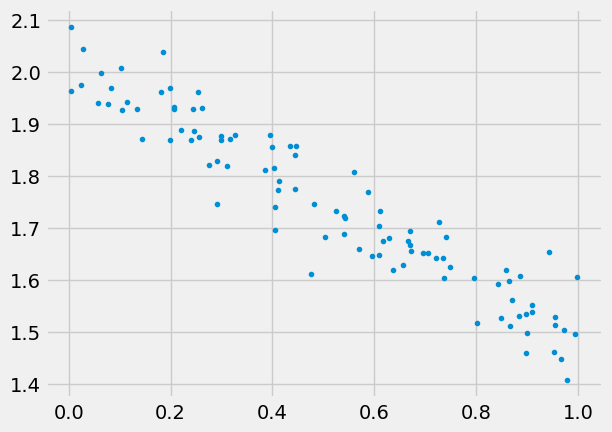

In [ ]:
np.random.seed(43)

b_true = 2.
w_true = -0.5
N = 100

x = np.random.rand(N,1)
epsilon = 0.05 * np.random.randn(N,1)
y = w_true*x + b_true + epsilon

plt.plot(x,y,'.')
plt.show()

## Linear regression with sklearn

Of course we can make a fit using sklearn:

In [ ]:
reg = LinearRegression().fit(x, y)
r2_coef = reg.score(x, y)
print(reg.coef_, reg.intercept_, r2_coef)

[[-0.52894853]] [2.01635764] 0.9014715901595961


but the point is to learn PyTorch and (soon) solve much bigger problems.

# create datasets, data loaders

- data set is the object that holds features and labels together, 
- split the data into train and valid 
- convert to pytorch tensors
- create datasets
- create data_loaders

In [ ]:
np.random.seed(43)
indices = np.arange(N)
np.random.shuffle(indices)
train_indices = indices[:int(0.8*N)]
val_indices = indices[int(0.8*N):]

device = 'cuda' if torch.cuda.is_available() else 'cpu'

train_x = torch.tensor(x[train_indices], dtype=torch.float32, device=device)
train_y = torch.tensor(y[train_indices], dtype=torch.float32, device=device)
val_x = torch.tensor(x[val_indices], dtype=torch.float32, device=device)
val_y = torch.tensor(y[val_indices], dtype=torch.float32, device=device)

train_dataset = TensorDataset(train_x, train_y)
val_dataset = TensorDataset(val_x, val_y)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# model, loss, and optimizer

In [ ]:
torch.random.manual_seed(42)
model = torch.nn.Linear(1,1, bias=True, device=device)
optimizer = optim.Adam(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

# train

In [ ]:
model.reset_parameters()
sbs = StepByStep(model, optimizer, loss_fn)
sbs.set_loaders(train_loader, val_loader)
sbs.train(30)

In [ ]:
sbs.model.state_dict()

OrderedDict([('weight', tensor([[-0.5267]])), ('bias', tensor([2.0177]))])

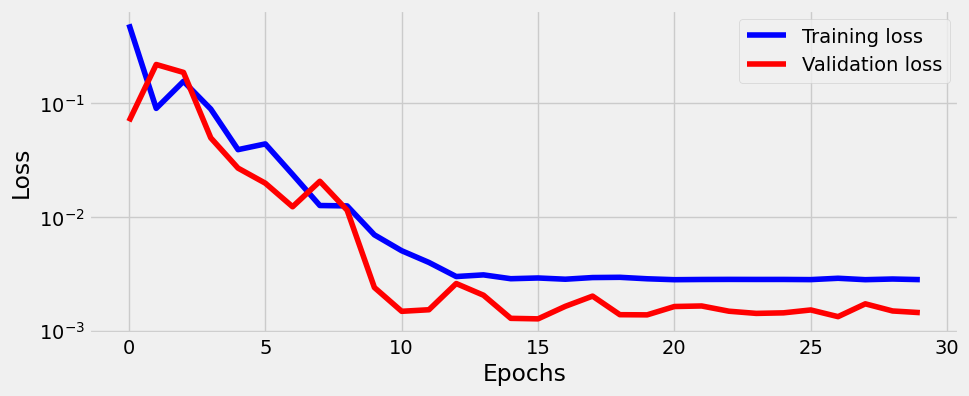

In [ ]:
sbs.plot_losses()

# predict

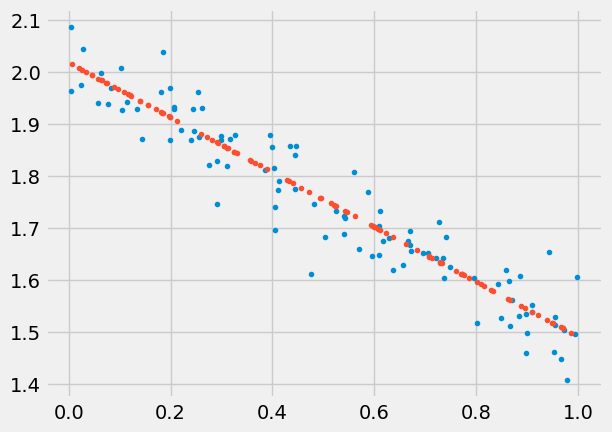

In [ ]:
test = np.random.rand(100,1)
test_predictions = sbs.predict(test)
plt.plot(x,y,'.')
plt.plot(test,test_predictions,'.')
plt.show()

# save/load model

In [ ]:
sbs.save_checkpoint('pera.pth')

In [ ]:
sbs.load_checkpoint('pera.pth')

# Visualize model

In [ ]:
yhat = sbs.model(torch.rand(10,1))
yhat

tensor([[1.8009],
        [1.8329],
        [1.5861],
        [1.5281],
        [1.7805],
        [1.8134],
        [1.7506],
        [1.7701],
        [1.6911],
        [1.6806]], grad_fn=<AddmmBackward0>)

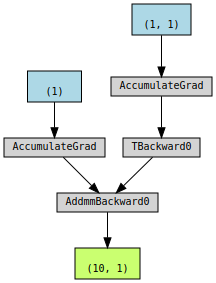

In [ ]:
#| hide
# TODO can't run `make_dot(yhat)`  TODO make graphviz work on GitHub getting error ExecutableNotFound: failed to execute Path('dot'), make sure the
make_dot(yhat)
# Graphviz executables are on your systems' PATH

# Tensorboard

Use tensorboard to see losses

In [ ]:
# TODO